In [1]:
import pathlib
import pickle
import numpy as np
# from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics

def get_acc(data):
    total = data['tp'] + data['tn'] + data['fp'] + data['fn']
    acc = (data['tp'] + data['tn']) / total
    return acc

def get_fpr(data):
    fpr = data['fp'] / (data['fp'] + data['tn'])
    return fpr

def get_fnr(data):
    fnr = data['fn'] / (data['fn'] + data['tp'])
    return fnr

def get_tpr(data):
    tpr = data['tp'] / (data['tp'] + data['fn'])
    return tpr

In [5]:
name = 'testing_results.bin'
name2 = 'stegastamp_testing_results.bin'
results = pickle.load(open(name,'rb'))
stega_results = pickle.load(open(name2, 'rb'))

In [6]:
preswap = stega_results['preswap']
swap = stega_results['swapped']
results['stegastamp'] = {
    'preswap_match': preswap,
    'swap_match': swap
}

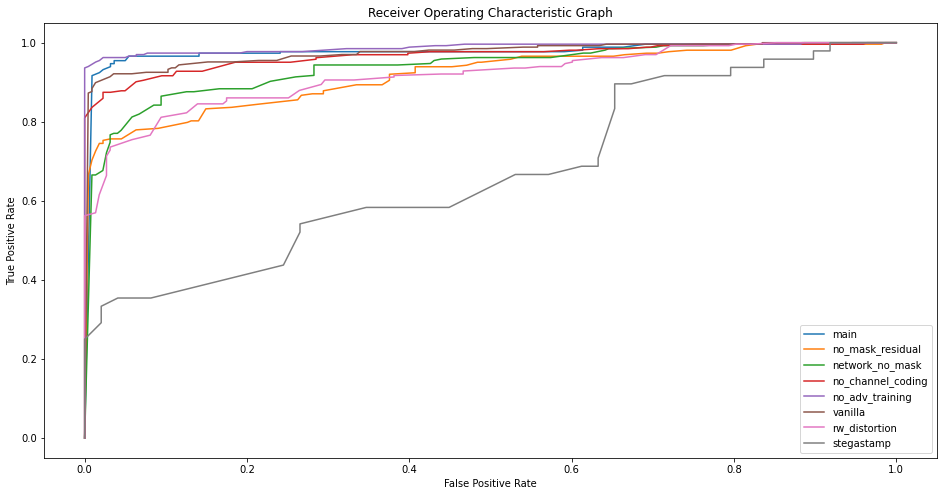

In [7]:
plt.figure(figsize=(16,8))
for result in results:
    preswap = results[result]['preswap_match']
    swap = results[result]['swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    plt.plot(fpr, tpr, label=f'{result}')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

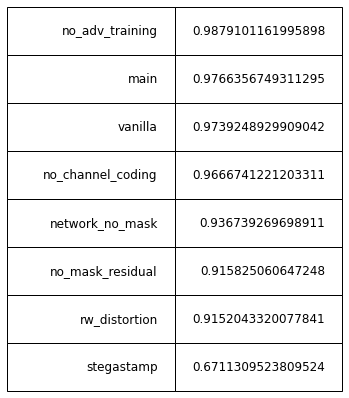

In [8]:
table_data = []

for result in results:
    preswap = results[result]['preswap_match']
    swap = results[result]['swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    table_data.append([result, auc])
    fpr, tpr, _ = metrics.roc_curve(gt, prob)


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')

# plt.figure(figsize=(16,8))
# plt.ylabel('AUC')
# plt.xlabel('Model')
# plt.title(f'AUC Score Graph')
# plt.bar(models, auc_data)
# plt.legend()
# plt.savefig(f'results/results_auc.png')
plt.show()